Given about 10000 transactions in an electronics store, we mine to find interesting association rules using apriori

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [2]:
# create dataframe to map transaction file with products as columns
products_df = pd.read_csv("Products.csv")
products_df['Product'].values
txdf = pd.DataFrame(columns = products_df['Product'].values)

,LG Touchscreen Laptop,Acer Aspire,HP Laptop,ASUS Chromebook,Apple Macbook Pro,Apple MacBook Air,Dell Laptop,Eluktronics Pro Gaming Laptop,"Alienware AW17R4-7345SLV-PUS 17"" Laptop",HP Notebook Touchscreen Laptop PC,...,1TB Portable External Hard Drive,2TB Portable External Hard Drive,5TB Desktop Hard Drive,Slim 2TB Portable External Hard Drive,3TB Portable External Hard Drive,Apple TV,Google Home,Smart Light Bulb,Fire TV Stick,Roku Express


In [3]:
# updates dataframe to map transactions to a new row each
file1 = open('ElectronidexTransactions2017.csv', 'r') 
Lines = file1.readlines() 
  
for line in Lines: 
    items = line.split(",")
    itemsintx = dict()
    for s in items:
        if s!='' and s!='\n':
            itemsintx[s]=1
    txdf = txdf.append(itemsintx, ignore_index=True)    

txdf = txdf.fillna(0)
print(txdf)

      LG Touchscreen Laptop  Acer Aspire  HP Laptop  ASUS Chromebook  \
0                       0.0          1.0        0.0              0.0   
1                       0.0          0.0        0.0              0.0   
2                       0.0          0.0        0.0              0.0   
3                       0.0          0.0        0.0              0.0   
4                       0.0          0.0        1.0              0.0   
...                     ...          ...        ...              ...   
9830                    0.0          1.0        0.0              1.0   
9831                    0.0          0.0        0.0              0.0   
9832                    0.0          1.0        1.0              0.0   
9833                    0.0          0.0        0.0              0.0   
9834                    0.0          0.0        1.0              0.0   

      Apple Macbook Pro  Apple MacBook Air  Dell Laptop  \
0                   0.0                0.0          0.0   
1                

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

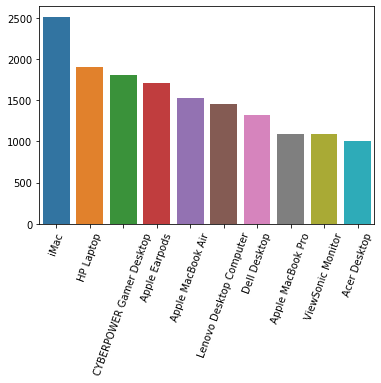

In [17]:
tx_item_sum = txdf.sum()
tx_item_sum.sort_values(ascending=False, inplace=True)
head = tx_item_sum.head(10)
sns.barplot(head.index, head.values)
plt.xticks(rotation=70)

In [4]:
frequent_itemsets = apriori(txdf, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
495,"(Acer Aspire, ViewSonic Monitor)",(HP Laptop),0.017895,0.194103,0.010778,0.602273,3.102856,0.007304,2.026256
668,"(Lenovo Desktop Computer, ASUS 2 Monitor)",(iMac),0.018404,0.255516,0.010880,0.591160,2.313594,0.006177,1.820968
716,"(Apple Magic Keyboard, Dell Desktop)",(iMac),0.017387,0.255516,0.010168,0.584795,2.288684,0.005725,1.793053
572,"(ASUS Monitor, HP Laptop)",(iMac),0.020234,0.255516,0.011693,0.577889,2.261656,0.006523,1.763718
579,"(HP Laptop, ASUS 2 Monitor)",(iMac),0.019014,0.255516,0.010981,0.577540,2.260289,0.006123,1.762260
638,"(ViewSonic Monitor, Dell Desktop)",(HP Laptop),0.026538,0.194103,0.015252,0.574713,2.960869,0.010101,1.894948
674,"(ViewSonic Monitor, Lenovo Desktop Computer)",(iMac),0.028368,0.255516,0.015760,0.555556,2.174249,0.008512,1.675089
620,"(Microsoft Office Home and Student 2016, HP La...",(iMac),0.023386,0.255516,0.012913,0.552174,2.161015,0.006938,1.662440
710,"(ViewSonic Monitor, Dell Desktop)",(iMac),0.026538,0.255516,0.014642,0.551724,2.159255,0.007861,1.660772
734,"(ViewSonic Monitor, Acer Desktop)",(iMac),0.018505,0.255516,0.010066,0.543956,2.128853,0.005338,1.632483


1. Support measures how frequent a particulat itemset is relative to all transactions
2. Confidence is the probability of the consequent given the antecedent. So, there is 60% chance that someone will buy HP Laptop if they've already bought Acer Aspire and ViewSonic Monitor
3. Lift measures how much more likely the consequent is given the antecedent. So, larger lift is more interesting. Here, someone who has bought Acer Aspire and ViewSonic Monitor is 3 x as likely to buy HP Laptop than someone chosen at random